In [70]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    )

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [72]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [73]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [74]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.drop(columns=['coin_id']))

In [75]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns[1:])  # exclude 'coin_id' from scaling
scaled_df['coin_id'] = df_market_data['coin_id']

# Set the coin_id column as index
scaled_df.set_index('coin_id', inplace=True)


# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [76]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [77]:
# Create an empty list to store the inertia values
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)


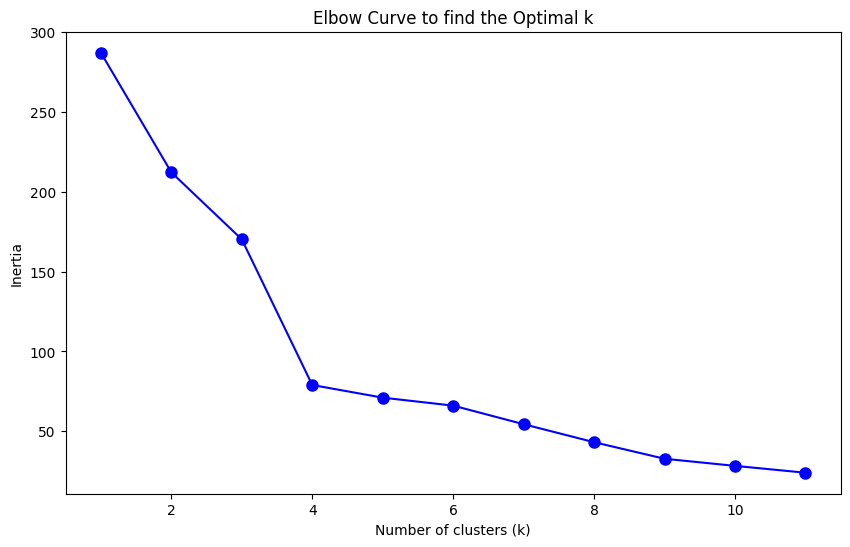

In [78]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}
plt.figure(figsize=(10,6))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-', markersize=8)
plt.title('Elbow Curve to find the Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The optimal value for k can be determined by finding the point where the curve starts to flatten.After k=4, the inertia reduction slows down significantly, indicating diminishing returns.So the best value for k is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [79]:
# Initialize the K-Means model using the best value for k
k_best = 4 
kmeans_model = KMeans(n_clusters=k_best, random_state=42)


In [80]:
# Fit the K-Means model using the scaled DataFrame
predicted_clusters = kmeans_model.fit_predict(scaled_df)

In [81]:
# Print the resulting array of cluster values.
predicted_clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [82]:
# Create a copy of the scaled DataFrame
clustered_df = scaled_df.copy()

In [83]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_df['predicted_cluster'] = predicted_clusters

# Display the clustered DataFrame
clustered_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [84]:
# Create a scatter plot using hvPlot by setting
scatter_plot = clustered_df.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='predicted_cluster', 
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering'
)

scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [85]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [86]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [87]:
# Retrieve the explained variance to determine how much information
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each component
print(f"Explained variance for each component: {explained_variance}")

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()
print(f"Total explained variance of the three principal components: {total_explained_variance:.4f}")

Explained variance for each component: [0.3719856  0.34700813 0.17603793]
Total explained variance of the three principal components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance of the three principal components: 0.8950

In [88]:
# Create a new DataFrame with the PCA data.
pca_columns = ['PC1', 'PC2', 'PC3']  # Naming the principal components
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Set the "coin_id" index from the original scaled DataFrame
pca_df['coin_id'] = scaled_df.index

# Set the index to "coin_id"
pca_df.set_index('coin_id', inplace=True)

# Display the PCA DataFrame
pca_df.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [89]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [90]:
# Create an empty list to store the inertia values
inertia_values_PCA = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

In [91]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
elbow_Data=pd.DataFrame(elbow_data)
elbow_Data

ValueError: All arrays must be of the same length

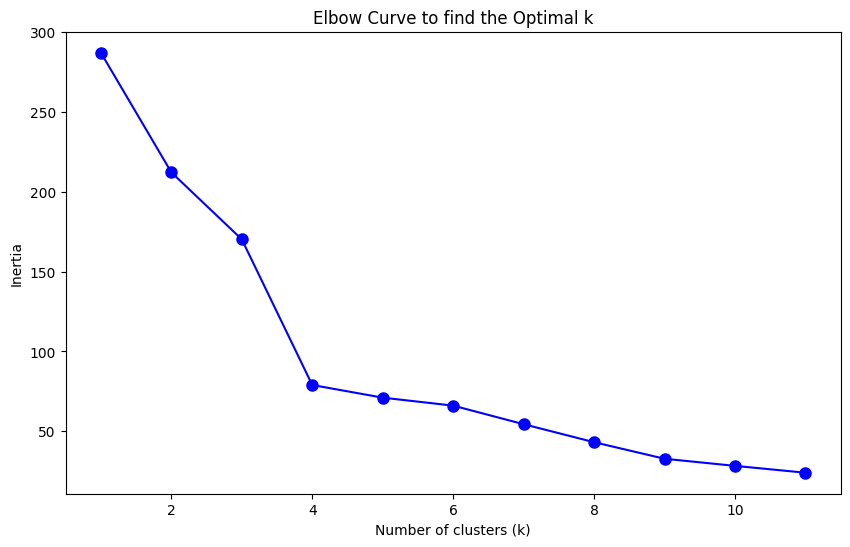

In [92]:
# Plot a line chart with all the inertia values computed with
plt.figure(figsize=(10,6))
plt.plot(elbow_Data['k'], elbow_Data['inertia'], 'bo-', markersize=8)
plt.title('Elbow Curve to find the Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn,t differ from the best k value found using the original data

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [93]:
# Initialize the K-Means model using the best value for k
k_best = 4 
kmeans_model_PCA = KMeans(n_clusters=k_best, random_state=42)

In [94]:
# Fit the K-Means model using the PCA data
predicted_clusters_PCA = kmeans_model_PCA.fit_predict(scaled_df)

In [95]:
predicted_clusters_PCA


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [96]:
# Create a copy of the scaled PCA DataFrame

clustered_df_PCA = pca_df.copy()
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
clustered_df_PCA['predicted_cluster'] = predicted_clusters_PCA

# Display the clustered DataFrame
clustered_df_PCA.head()


,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [97]:
# Create a scatter plot using hvPlot by setting
scatter_plot = clustered_df_PCA.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='predicted_cluster', 
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering'
)

scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [98]:
# Composite plot to contrast the clusters
original_plot = clustered_df.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='predicted_cluster', 
    title='Clusters (Original Scaled Data)', 
    hover_cols=['coin_id']
)

pca_plot = clustered_df_PCA.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='predicted_cluster', 
    title='Clusters (PCA-Reduced Data)', 
    hover_cols=['coin_id']
)

# Display the composite plot
(original_plot + pca_plot).cols(2)

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** In the left plot, clusters are distributed across a wider range of values for both axes (price_change_percentage_24h and price_change_percentage_7d). Some clusters (especially those 0 and 2) seem well-separated, while others have more overlap with other clusters, indicating potential ambiguity in cluster membership.In the right plot, the clusters are represented using the principal components (PC1 and PC2). Here, the data points seem more tightly grouped, and the overall spread of the clusters is more compact. This suggests that PCA might have highlighted the underlying structure more effectively.Clustering based on original features allows for a direct interpretation of how the cryptocurrencies behave regarding price changes over different time frames. However, with many features, the relationships can become complex, making it difficult to interpret cluster characteristics.The PCA approach transforms the data into a new feature space where the clusters are possibly based on combinations of the original features. While this can simplify the analysis and improve clustering performance, it may also make it harder to relate the clusters back to the original data features without additional analysis.
